# Final Project Template

For the final project for this module, you are asked to use data analysis techniques and linear regression to create a model to predict housing prices. 

In Video 7.9, Dr. Williams presented you with an example of data analysis in which housing prices were predicted by using just the columns `OverallQual` and `MassVnrArea` from the data provided. In Video 7.10, Dr. Williams showed more examples of data visualization and manipulation in addition to a more detailed analysis of the data.

Your challenge in this project is to improve Dr. Williams' results from Video 7.9 by choosing different variables in the *dataframe* to create your model. Although in Video 7.10 you are offered a sample data analysis which uses five columns from the data provided, your project submission must include an analysis of at least three additional variables and offer other solutions that improve the results obtained by Dr. Williams in these two videos.

Before you fill out the project outline template below, make sure you:

- Read through the template completely to understand the instructions for the structure of the project.
- Have a clear understanding of what to do to create a model that will return the results you want to find.
- Use Markdown to edit the template.

<div class="alert alert-block alert-success">
The purpose of this Jupyter Notebook is to give you a structure to follow when you are solving your problem and developing your model with Python. Make sure you follow it carefully. You can add more subsections if needed, but remember to fill out every section provided in the template.
</div>

<div class="alert alert-block alert-danger">
Delete all cells above, including this one, before submitting your final Notebook.
</div>

# Building-a-Model-to-Predict-Housing-Prices-Project

**Surabhi Jagtap**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Importing Data
RawData = pd.read_csv("houseSmallData.csv", index_col=0)
RawData[0:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Understanding the Data
RawData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    86 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond    1

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

In [7]:
#Lets first select the numeric columns
DataNum = RawData.select_dtypes(include=[np.number])
DataNum = DataNum[DataNum.columns[1:]]
DataNum.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

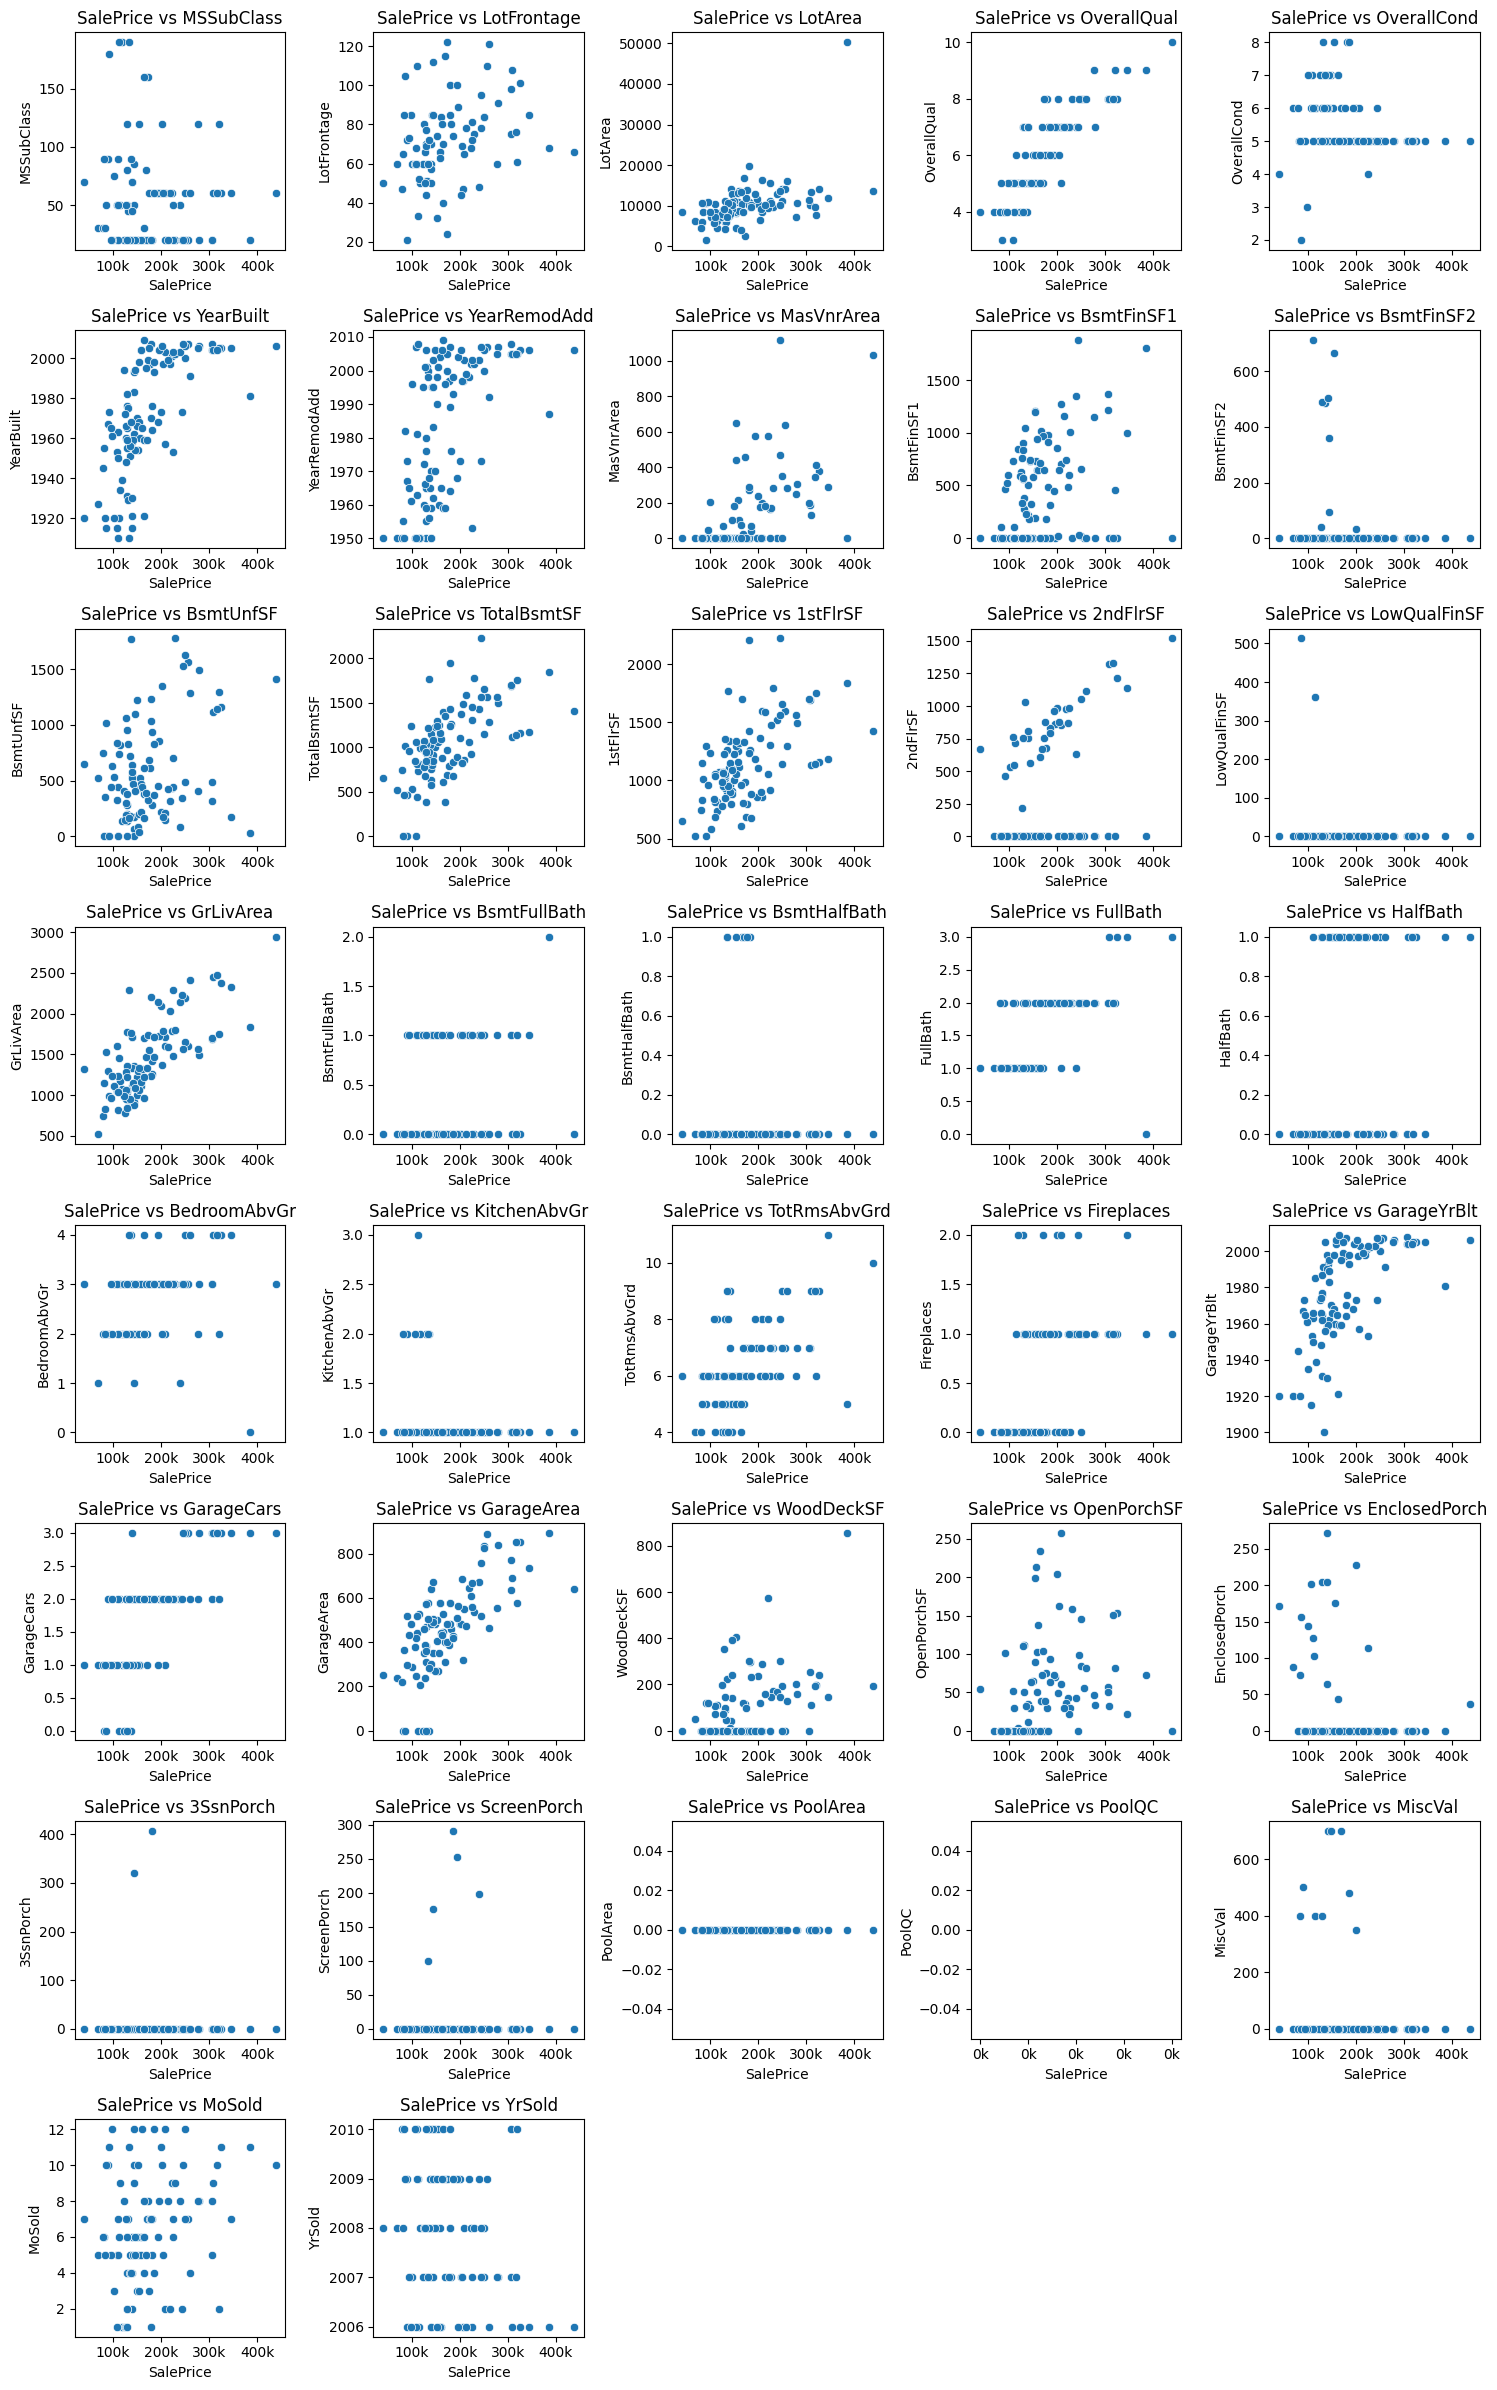

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed
num_rows = (len(DataNum.columns) + 5 - 1) // 5

# Create subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Plot the scatter plots
for i, column in enumerate(DataNum.columns[:-1]):  # Exclude the target column 'SalePrice'
    ax = axs[i]
    sns.scatterplot(data=DataNum, x='SalePrice', y=column, ax=ax)
    ax.set_title(f'SalePrice vs {column}')
    ax.set_xlabel('SalePrice')
    ax.set_ylabel(column)
    # Change x-axis ticks to represent thousands
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Hide empty subplots
for i in range(len(DataNum.columns)-1, len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


**Based on the visual representation of the relationships of variables with the SalePrice, following obervations can be noted:**
1. None of the variable perfectly correlates with SalePrice.
2. PoolQC variable is empty and PoolArea is 0, therefore both variables shall be discarded
3. Variables namely 'MiscVal', 'ScreenPorch', '3SsnPorch', 'KitchenAbvGr', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'LowQualFinSF', 'BsmtFinSF2' does not look very interesting to be able to use for training LR model. However, the more details calculations will make it more clear.
4. Overall, the above plots seem to be very helpful to inspect the relationship between dependent variable and independent variables.

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


In [18]:
# As we observed in the previous plots that there are some missing values. 
# Lets try to identify them in the dataframe and clean those to make our life easier.
DataNum.fillna(value=np.nan, inplace=True)
#DataNum.isna()
DataNum



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,NaN,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,NaN,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,NaN,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,NaN,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,NaN,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,NaN,9765,6,8,1993,1993,68.0,310,0,...,63,0,0,0,0,NaN,480,4,2009,185000
96,20,78.0,10264,7,5,1999,1999,183.0,1162,0,...,29,0,0,0,0,NaN,0,8,2006,214000
97,20,73.0,10921,4,5,1965,1965,48.0,520,0,...,0,0,0,0,0,NaN,0,5,2007,94750
98,30,85.0,10625,5,5,1920,1950,0.0,108,0,...,0,77,0,0,0,NaN,400,5,2010,83000


[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?




[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .
